In [12]:
from math import atan2, hypot
import numpy as np
import matplotlib.pyplot as plt
import half_tone_selector.color as htc

import importlib
importlib.reload(htc)

<module 'half_tone_selector.color' from 'D:\\Repos\\half_tone_selector\\half_tone_selector\\color.py'>

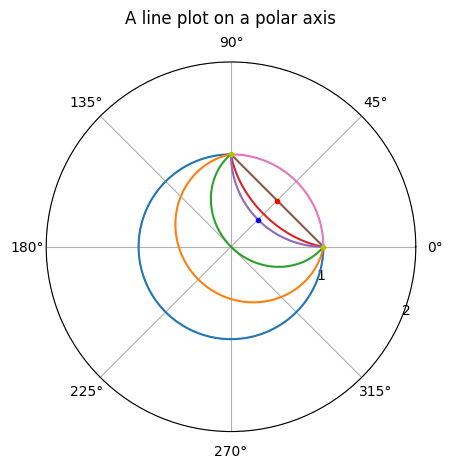

In [67]:
ab = [
    (np.pi*0.0, np.pi*0.5),
    (np.pi*0.5, np.pi*0.0),
    (np.pi*0.25, np.pi*1.75),
    (np.pi*1.75, np.pi*0.25),
    (2.28, 1.91),
]
a, b = ab[0]
ab = atan2(np.sin(a) + np.sin(b), np.cos(a) + np.cos(b))
p = min(abs(b-a), 2*np.pi - abs(b-a))/2

def getPoints(k):
    lch1 = (1, 1, a)
    lch2 = (1, 1, b)
    lchs = [htc.interpolateOklch(lch1, lch2, t, k) for t in np.arange(0, 1.01, 0.01)]
    r = [c for _, c, _ in lchs]
    theta = [h for _, _, h in lchs]
    return r, theta

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for k in [-1, -0.5, 0, 0.5, 2*np.cos(p)-1, np.cos(p), 1]:
    r, theta = getPoints(k)
    ax.plot(theta, r)
ax.plot([-p+ab, p+ab], [1, 1], 'y.')
ax.plot(ab, np.cos(p), 'r.')
ax.plot(ab if 2*np.cos(p)-1 >= 0 else np.pi+ab, abs(2*np.cos(p)-1), 'b.')
ax.set_rmax(2)
ax.set_rticks([1, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

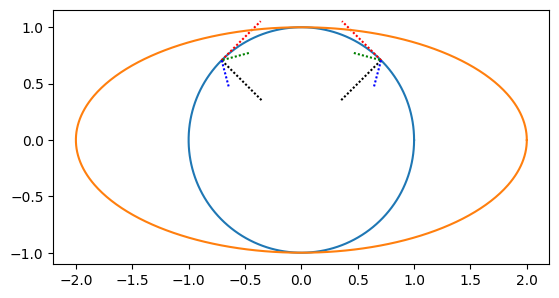

In [66]:
t = np.arange(0, np.pi*2, 0.01)
xs = np.cos(t)
ys = np.sin(t)

def point(theta, r):
    return [r*np.cos(theta), r*np.sin(theta)]

def tangent(p, sign):
    scale = hypot(*p)
    return [-p[1]/scale*sign, p[0]/scale*sign]

def rotate(theta, p):
    return [
        np.cos(theta)*p[0] - np.sin(theta)*p[1],
        np.sin(theta)*p[0] + np.cos(theta)*p[1],
    ]

def drawPoint(p, theta, sign):
    t = np.arange(-0.5, 0, 0.01)
    line, = plt.plot(p[0]*(1+t), p[1]*(1+t), 'k')
    line.set_dashes([1, 1])

    t = np.arange(0, 0.5, 0.01)
    d = tangent(p, -sign)
    line, = plt.plot(p[0]+d[0]*t, p[1]+d[1]*t, 'r')
    line.set_dashes([1, 1])

    t = np.arange(-0.25, 0, 0.01)
    rp = rotate(sign*np.pi/3, p)
    line, = plt.plot(p[0]+rp[0]*t, p[1]+rp[1]*t, 'g')
    line.set_dashes([1, 1])

    t = np.arange(0, 0.25, 0.01)
    rd = tangent(rp, sign)
    line, = plt.plot(p[0]+rd[0]*t, p[1]+rd[1]*t, 'b')
    line.set_dashes([1, 1])

plt.gca().set_aspect('equal', adjustable='box')
plt.plot(xs, ys)

points = [
    point(np.pi*0.25, 1),
    point(np.pi*0.75, 1),
]

for i, p in enumerate(points):
    drawPoint(p, sign*np.pi/3, (-1)**(i+1))

x = 0
A = 2
B = 1
t = np.arange(0, np.pi*2, 0.01)
xs = (A-B)/2*np.cos(t-x) + (A+B)/2*np.cos(t+x)
ys = (A+B)/2*np.sin(t+x) - (A-B)/2*np.sin(t-x)
plt.plot(xs, ys)

# ((A-B)*cos(t-r)+(A+B)*cos(t+r))/2 + X
# ((A+B)*sin(t+r)-(A-B)*sin(t-r))/2 + Y
# C=(A+B)/2, D=(A-B)/2
# D*cos(t-r) + C*cos(t+r) + X
# C*sin(t+r) - D*sin(t-r) + Y

# Derivative:
# -(D*sin(t-r) + C*sin(t+r))
#   C*cos(t+r) - D*cos(t-r)

# dx1 = -y1*K1
# dy1 = x1*K1

# Equalities
# x1 = D*cos(t1-r) + C*cos(t1+r) + X
# y1 = C*sin(t1+r) - D*sin(t1-r) + Y
# dx1 = -(D*sin(t1-r) + C*sin(t1+r))
# dy1 = C*cos(t1+r) - D*cos(t1-r)

#  x1  = C*cos(t1+r) + D*cos(t1-r) + X
#  dy1 = C*cos(t1+r) - D*cos(t1-r)
#  y1  = C*sin(t1+r) - D*sin(t1-r) + Y
# -dx1 = C*sin(t1+r) + D*sin(t1-r)

# x1+dy1-X =  2*C*cos(t1+r)  
# x1-dy1-X =  2*D*cos(t1-r) 
# y1-dx1-Y =  2*C*sin(t1+r) 
# y1+dx1-Y = -2*D*sin(t1-r) 

# (x1+dy1-X)^2 + (y1-dx1-Y)^2 - (2*C)^2 = 0
# (x1-dy1-X)^2 + (y1+dx1-Y)^2 - (2*D)^2 = 0
# (x2+dy2-X)^2 + (y2-dx2-Y)^2 - (2*C)^2 = 0
# (x2-dy2-X)^2 + (y2+dx2-Y)^2 - (2*D)^2 = 0

# ([0]-X)^2 + ([1]-Y)^2 - (2*C)^2 = 0
# ([2]-X)^2 + ([3]-Y)^2 - (2*D)^2 = 0
# ([4]-X)^2 + ([5]-Y)^2 - (2*C)^2 = 0
# ([6]-X)^2 + ([7]-Y)^2 - (2*D)^2 = 0

# X^2+Y^2 - 2*([0]*X+[1]*Y) + [0]^2+[1]^2 - (2*C)^2 = 0
# X^2+Y^2 - 2*([2]*X+[3]*Y) + [2]^2+[3]^2 - (2*D)^2 = 0
# X^2+Y^2 - 2*([4]*X+[5]*Y) + [4]^2+[5]^2 - (2*C)^2 = 0
# X^2+Y^2 - 2*([6]*X+[7]*Y) + [6]^2+[7]^2 - (2*D)^2 = 0



In [ ]:
from matplotlib.patches import Circle

def draw(x1, y1, dx1, dy1, x2, y2, dx2, dy2, a, b):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    circles = [
        (),
        (),
        (),
        (),
    ]
    for x, y ,r in circles:
        ax.add_patch(Circle((x, y), r))
    
    plt.show()

draw(1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

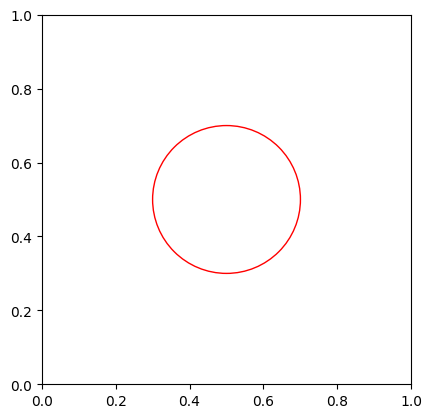

In [69]:


# Create a circle patch
circle = Circle((0.5, 0.5), 0.2, edgecolor='r', facecolor='none')  # Center coordinates (0.5, 0.5), radius 0.2

# Add the circle patch to the axes
ax.add_patch(circle)

